# Sindrome de down

## Variaveis de Interesse 

In [1]:
target_anomalies = ['Q900','Q901','Q902','Q903','Q904','Q905','Q906','Q907','Q908','Q909']
target_years = list(range(2010,2020))
target_states = ['SP']

## Importing Libs

In [311]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.path.join(os.path.abspath(os.getcwd()).replace('= ',''),'..'))
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from src.features.feature_selection import Feature_Selection
from src.features.feature_engineering import Feature_Engineering
from src.visualization.visualize import Visualizer
from src.data.retrievers import SINASC_Retriever
from src.data.explorer import GraphExplorer
from src.io_utils import IO_Utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
root_dir = os.path.join(os.path.abspath(os.getcwd()).replace('= ',''),'..')
data_dir = os.path.join(root_dir,'data')
processed_data_dir = os.path.join(data_dir,'processed')

In [312]:
%load_ext autoreload
%autoreload 2
retriever = SINASC_Retriever()
fe = Feature_Engineering()
fs = Feature_Selection()
io_utils = IO_Utils()
ge = GraphExplorer()
vi = Visualizer()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating Processed Data

In [ ]:
# df_anomalies = retriever.extract_rows_anomalie(states=target_states,
#                                                 years=target_years,
#                                                 anomalie_codes=target_anomalies,
#                                                 anomalies_present=True)
# io_utils.save_df_zipped_csv(df=df_anomalies,dirpath=processed_data_dir,file_name='df_sindrome_down')
# df_no_anomalies = retriever.extract_rows_anomalie(states=target_states,
#                                                 years=target_years,
#                                                 anomalie_codes=target_anomalies,
#                                                 anomalies_present=False)

# io_utils.save_df_zipped_csv(df=df_no_anomalies,dirpath=processed_data_dir,file_name='df_no_sindrome_down')
# df_no_anomalies_cropped = df_no_anomalies.sample(frac=1)[:len(df_anomalies)].reset_index(drop=True)
# io_utils.save_df_

## Getting Processed data

In [213]:
df_anomalies = pd.read_csv(os.path.join(processed_data_dir,'df_sindrome_down.zip'))
df_anomalies['ANOMAL_PRESENT'] = 1
df_no_anomalies_cropped = pd.read_csv(os.path.join(processed_data_dir,'df_no_sindrome_down_cropped.zip'))
df_no_anomalies_cropped['ANOMAL_PRESENT'] = 0
df = pd.concat([df_anomalies,df_no_anomalies_cropped], ignore_index=True).sample(frac=1).reset_index(drop=True)
df = df.drop(['CODANOMAL', 'STATE', 'YEAR','CONTADOR'],axis = 1)

## Raw Data Exploration

array([[<AxesSubplot:title={'center':'IDADEMAE'}>,
        <AxesSubplot:title={'center':'ESTCIVMAE'}>,
        <AxesSubplot:title={'center':'ESCMAE'}>,
        <AxesSubplot:title={'center':'QTDFILVIVO'}>,
        <AxesSubplot:title={'center':'QTDFILMORT'}>],
       [<AxesSubplot:title={'center':'GESTACAO'}>,
        <AxesSubplot:title={'center':'GRAVIDEZ'}>,
        <AxesSubplot:title={'center':'PARTO'}>,
        <AxesSubplot:title={'center':'CONSULTAS'}>,
        <AxesSubplot:title={'center':'SEXO'}>],
       [<AxesSubplot:title={'center':'APGAR1'}>,
        <AxesSubplot:title={'center':'APGAR5'}>,
        <AxesSubplot:title={'center':'RACACOR'}>,
        <AxesSubplot:title={'center':'PESO'}>,
        <AxesSubplot:title={'center':'RACACORMAE'}>],
       [<AxesSubplot:title={'center':'QTDGESTANT'}>,
        <AxesSubplot:title={'center':'QTDPARTNOR'}>,
        <AxesSubplot:title={'center':'QTDPARTCES'}>,
        <AxesSubplot:title={'center':'IDADEPAI'}>,
        <AxesSubplot:title={'cen

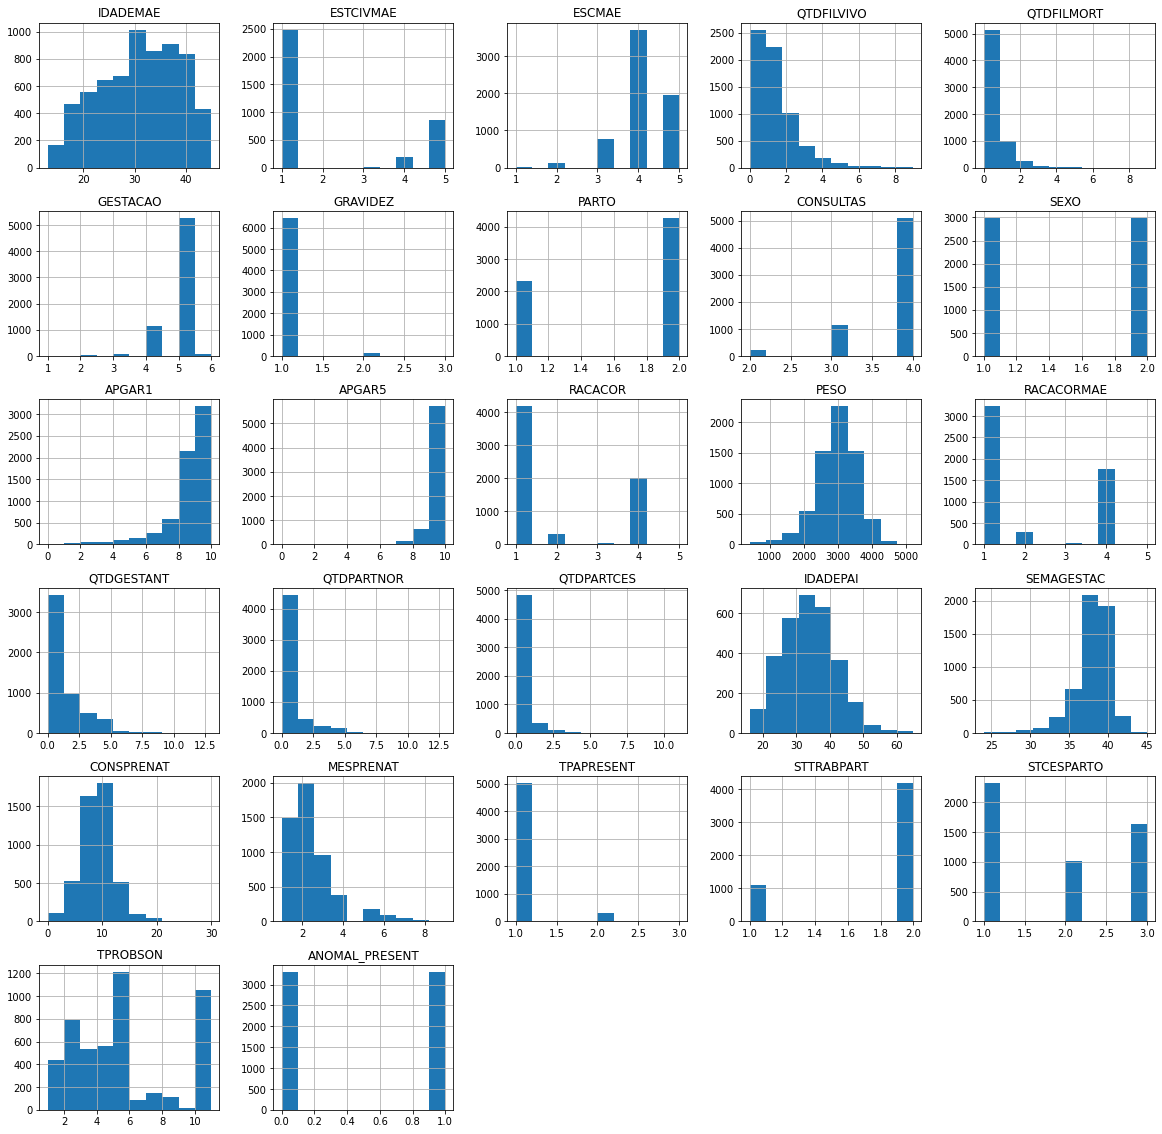

In [186]:
df.hist(figsize = (20,20))

In [38]:
ge.get_correlation_graphs(df)

In [ ]:
ge.get_correlation_graphs_for_categorical_variable(df,ANOMAL_PRESENT)

## Feature Engineering and Feature Seselection

Inputar nos valores NaN

In [214]:
df = retriever.map_columns_as_categoricals(df)
df_cats = df.select_dtypes(['category'])
df_consts = df[[x for x in df.columns if x not in df_cats.columns]] 
#df_cats_codes = fe.get_cat_columns_in_codes(df_cats)

In [215]:
df_cats_imp = fe.max_freq_inputer(df_cats)
df_consts_imp = fe.iterative_inputer_integer(df_consts)
df_cats_imp_codes = fe.get_cat_columns_in_codes(df_cats_imp)
df_hist = df_cats_imp_codes.join(df_consts_imp)

array([[<AxesSubplot:title={'center':'ESTCIVMAE'}>,
        <AxesSubplot:title={'center':'ESCMAE'}>,
        <AxesSubplot:title={'center':'GESTACAO'}>,
        <AxesSubplot:title={'center':'GRAVIDEZ'}>,
        <AxesSubplot:title={'center':'PARTO'}>],
       [<AxesSubplot:title={'center':'CONSULTAS'}>,
        <AxesSubplot:title={'center':'SEXO'}>,
        <AxesSubplot:title={'center':'RACACOR'}>,
        <AxesSubplot:title={'center':'RACACORMAE'}>,
        <AxesSubplot:title={'center':'TPAPRESENT'}>],
       [<AxesSubplot:title={'center':'STTRABPART'}>,
        <AxesSubplot:title={'center':'STCESPARTO'}>,
        <AxesSubplot:title={'center':'TPROBSON'}>,
        <AxesSubplot:title={'center':'IDADEMAE'}>,
        <AxesSubplot:title={'center':'QTDFILVIVO'}>],
       [<AxesSubplot:title={'center':'QTDFILMORT'}>,
        <AxesSubplot:title={'center':'APGAR1'}>,
        <AxesSubplot:title={'center':'APGAR5'}>,
        <AxesSubplot:title={'center':'PESO'}>,
        <AxesSubplot:title={'cen

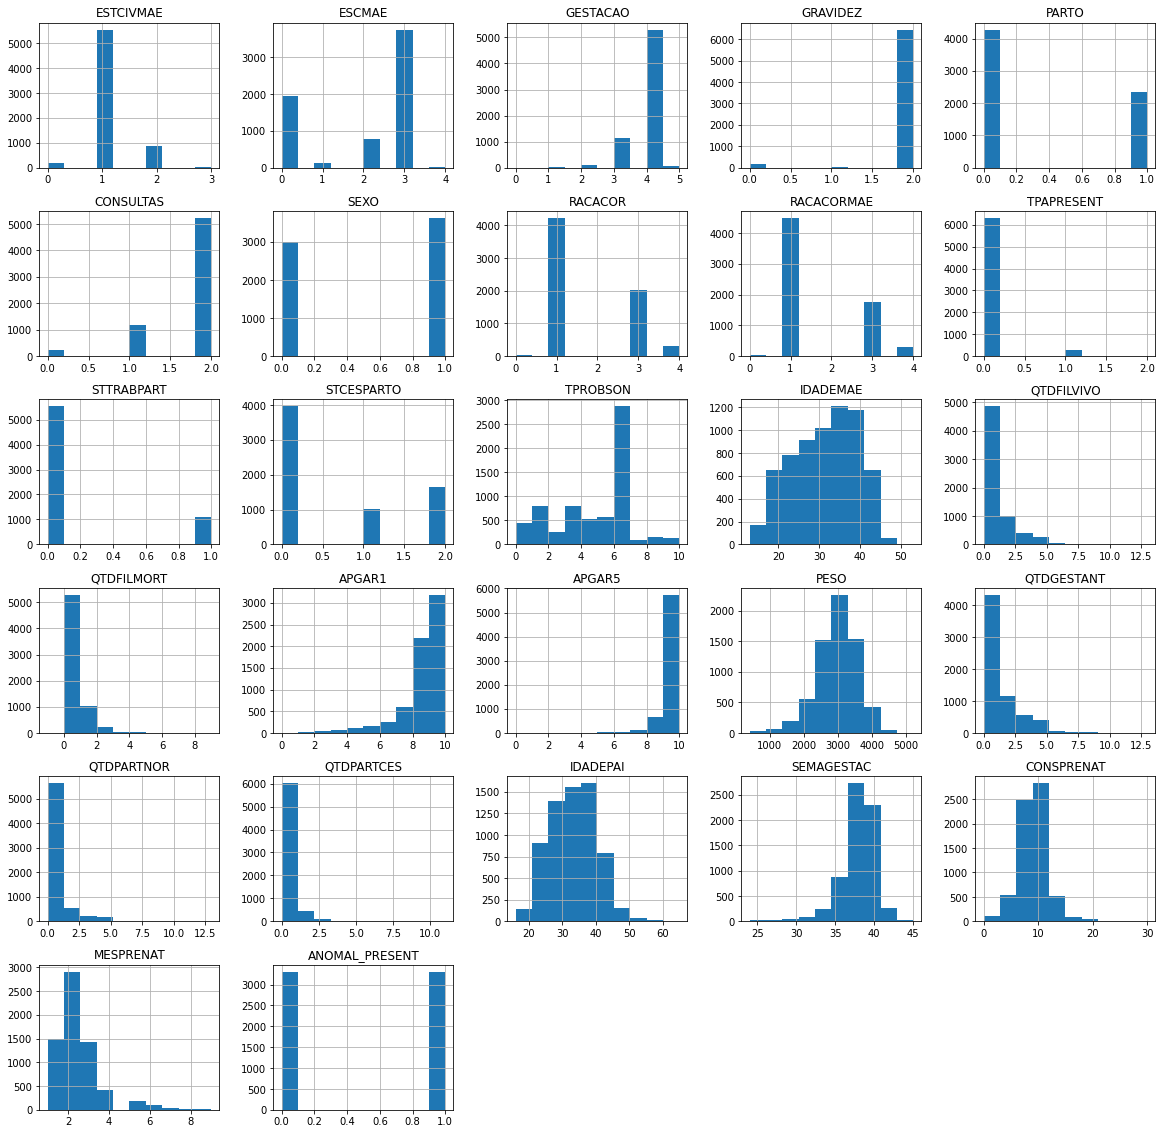

In [216]:
df_hist.hist(figsize = (20,20))

One Hot encoding categorical columns

In [218]:
df_cats_imp = fe.one_hot_encode_columns(df_cats_imp,df_cats_imp.columns)
df_cats_imp.head()

,Separado_Judicial,Solteiro,Uniao_Estavel,Viuvo,12_+_esc,1_3_esc,4_7_esc,8_11_esc,sem_esc,22_-_semgest,...,robson_10,robson_11,robson_2,robson_3,robson_4,robson_5,robson_6,robson_7,robson_8,robson_9
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Recuperando dataframe processado final

In [219]:
df_processed = df_cats_imp.join(df_consts_imp)
df_processed.head()

,Separado_Judicial,Solteiro,Uniao_Estavel,Viuvo,12_+_esc,1_3_esc,4_7_esc,8_11_esc,sem_esc,22_-_semgest,...,APGAR5,PESO,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,SEMAGESTAC,CONSPRENAT,MESPRENAT,ANOMAL_PRESENT
0,0,1,0,0,0,0,0,1,0,0,...,10,2585,0,0,0,26,38,9,3,0
1,0,1,0,0,0,0,0,1,0,0,...,10,2695,0,0,0,26,38,8,2,0
2,0,0,1,0,0,0,1,0,0,0,...,9,3250,3,2,1,36,39,4,3,1
3,0,1,0,0,0,0,0,1,0,0,...,9,3205,6,2,3,37,38,7,4,1
4,0,1,0,0,1,0,0,0,0,0,...,10,3590,0,0,0,33,40,7,2,0


Fazendo split e normalização

In [220]:
X,y = fe._split_df_in_xy(df_processed,target_column='ANOMAL_PRESENT')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = fe.fit_normalizer(df_train=X_train ,normalization_strategy='min_max_scaler')
X_train = fe.normalize_data(X_train,scaler)
X_test = fe.normalize_data(X_test,scaler)

## Model

Random forest Classifier

In [224]:
from sklearn.ensemble import RandomForestClassifier

In [225]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Extracting Metrics

Classification Report

In [236]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       671
           1       0.74      0.76      0.75       653

    accuracy                           0.75      1324
   macro avg       0.75      0.75      0.75      1324
weighted avg       0.75      0.75      0.75      1324



Roc Curve

<AxesSubplot:title={'center':'Curva ROC'}, xlabel='Taxa de Falso Positivo', ylabel='Taxa de Verdadeiro Positivo'>

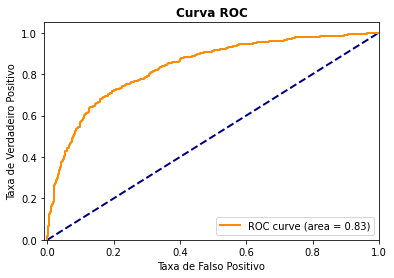

In [299]:
y_pred_prob = clf.predict_proba(X_test)
vi.plot_roc_curve(y_true = np.array(y_test), y_prob = y_pred_prob, labels = ['not_anomalie','anomalie'])

Confusion Matrix

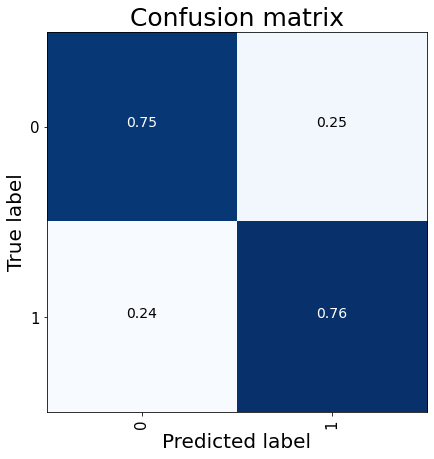

In [313]:
vi.plot_confusion_matrix(y_true=y_test, y_pred=y_pred,labels=y_train.unique())

## Explaining Model

https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [321]:
fig = plt.Figure()
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.00262
Feature: 1, Score: 0.00495
Feature: 2, Score: 0.00558
Feature: 3, Score: 0.00039
Feature: 4, Score: 0.01154
Feature: 5, Score: 0.00171
Feature: 6, Score: 0.00363
Feature: 7, Score: 0.01053
Feature: 8, Score: 0.00011
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00057
Feature: 11, Score: 0.00126
Feature: 12, Score: 0.01438
Feature: 13, Score: 0.01382
Feature: 14, Score: 0.00128
Feature: 15, Score: 0.00380
Feature: 16, Score: 0.00016
Feature: 17, Score: 0.00361
Feature: 18, Score: 0.00528
Feature: 19, Score: 0.00519
Feature: 20, Score: 0.00216
Feature: 21, Score: 0.00463
Feature: 22, Score: 0.00501
Feature: 23, Score: 0.00578
Feature: 24, Score: 0.00586
Feature: 25, Score: 0.00073
Feature: 26, Score: 0.00479
Feature: 27, Score: 0.00050
Feature: 28, Score: 0.00479
Feature: 29, Score: 0.00285
Feature: 30, Score: 0.00061
Feature: 31, Score: 0.00498
Feature: 32, Score: 0.00026
Feature: 33, Score: 0.00469
Feature: 34, Score: 0.00299
Feature: 35, Score: 0.00333
Fe

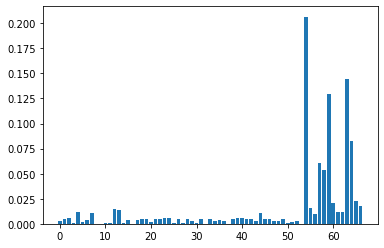

In [322]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [334]:
df_explain = pd.DataFrame(columns=['feature','importance'])
df_explain['feature'] = X_train.columns
df_explain['importance'] = importance
df_explain_ordered = df_explain.sort_values('importance',ascending=False)
df_explain_ordered.head(10)

,feature,importance
54,IDADEMAE,0.206569
63,IDADEPAI,0.144583
59,PESO,0.129002
64,SEMAGESTAC,0.083091
57,APGAR1,0.061023
58,APGAR5,0.053329
65,CONSPRENAT,0.023168
60,QTDGESTANT,0.020977
66,MESPRENAT,0.017472
55,QTDFILVIVO,0.015908


In [ ]:
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))